# Практическое задание к уроку 3
## Визуальный анализ данных

# Задача 1
Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы
1.1. Скачать файл kc_house_data.csv - приложен на платформе

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv', sep = ',', encoding='latin-1')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df['price'].max()

7700000.0

1.2 Изучите стоимости недвижимости

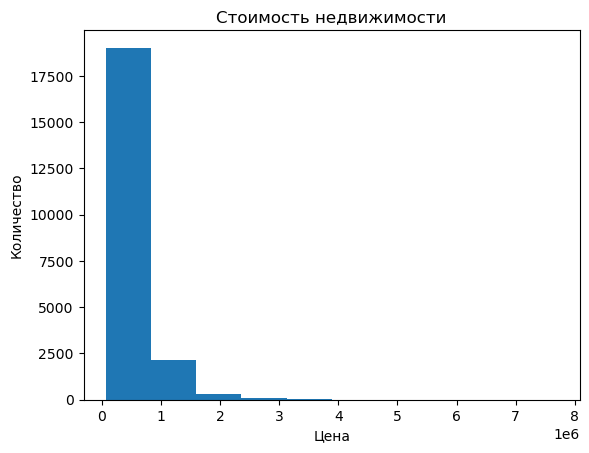

In [34]:
plt.hist(df['price'])
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Стоимость недвижимости');

1.3 Изучите распределение квадратуры жилой

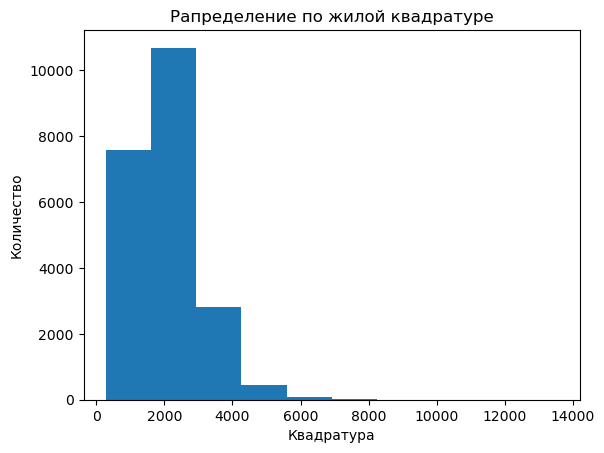

In [32]:
plt.hist(df['sqft_living'],bins=10)
plt.xlabel('Квадратура')
plt.ylabel('Количество')
plt.title('Рапределение по жилой квадратуре');

Изучите распределение года постройки

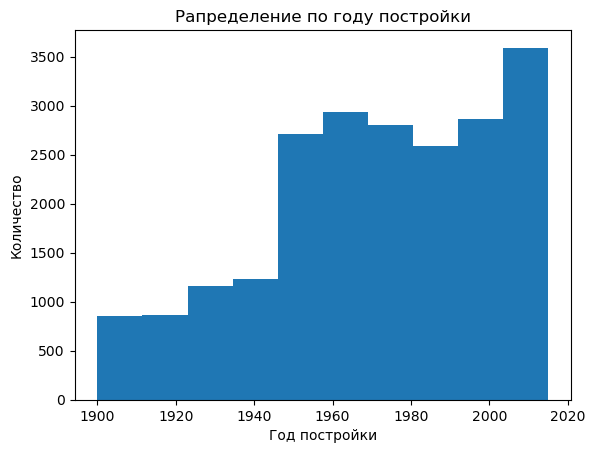

In [31]:
plt.hist(df['yr_built'])
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Рапределение по году постройки');

Большая часть квартир в диапазоне 2000-2020 г. постройки

# Задача 2
2.1 Изучите распределение домов от наличия вида на набережную
Постройте графикю Сделайте выводы
2.2 Изучите распределение этажей домов
2.2 Изучите распределение состояния домов

In [59]:
data = df['floors'].value_counts()

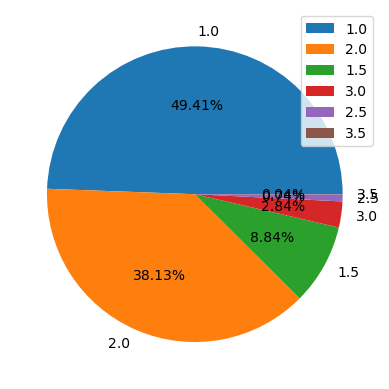

In [60]:
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index);

По данным диаграммы  видно большинство домов одно и двухэтажных. 49.4% - одноэтажные и 38.1% двухэтажный

In [64]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

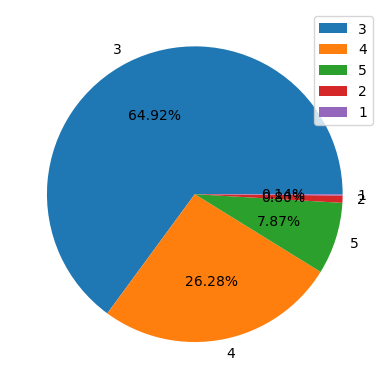

In [65]:
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index);

# Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


In [67]:
import seaborn as sns

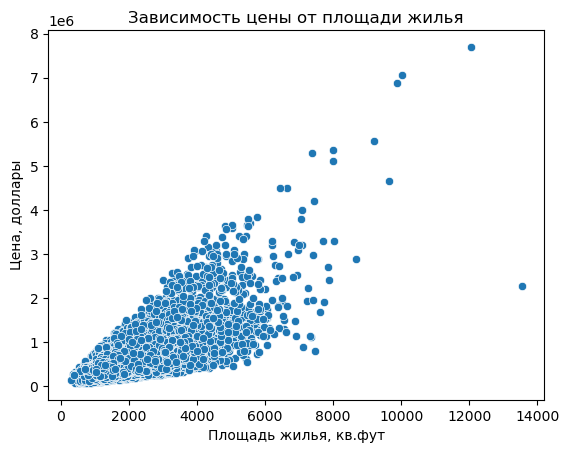

In [68]:
sns.scatterplot(df, x="sqft_living", y="price")
plt.title("Зависимость цены от площади жилья")
plt.xlabel("Площадь жилья, кв.фут")
plt.ylabel("Цена, доллары")
plt.show()

Диаграмма показывает, что стоимость недвижимости имеет прямую зависимость от площади жилья. Чем больше площадь жилья, тем выше стоимость недвижимости.

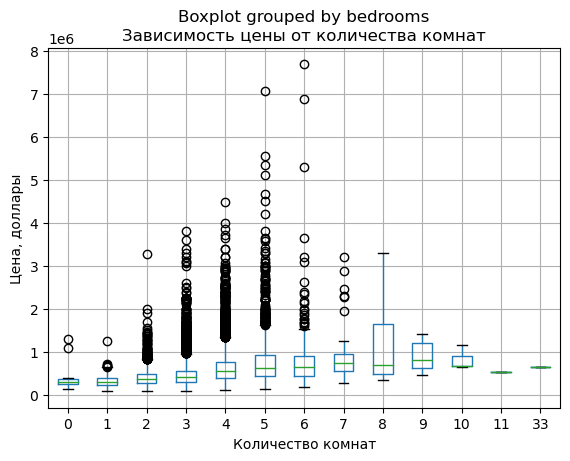

In [69]:
df.boxplot(column=["price"], by=["bedrooms"])
plt.title("Зависимость цены от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Цена, доллары")
plt.show()

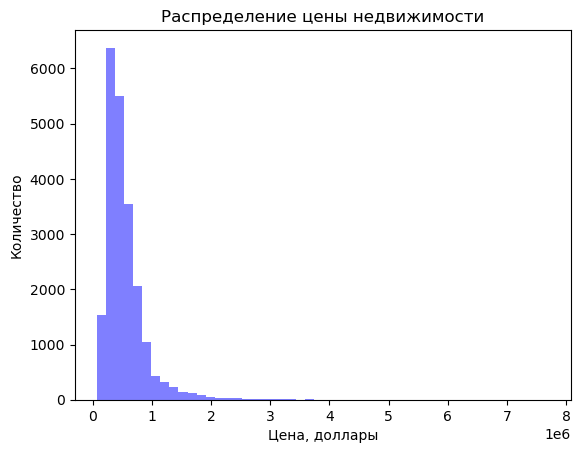

In [71]:
plt.hist(df["price"], bins=50, color="blue", alpha=0.5)
plt.title("Распределение цены недвижимости")
plt.xlabel("Цена, доллары")
plt.ylabel("Количество")
plt.show()

C:\Users\92202\AppData\Local\Temp\ipykernel_28052\1560337173.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("waterfront").mean()["price"].plot(kind="bar", color="blue", alpha=0.5)


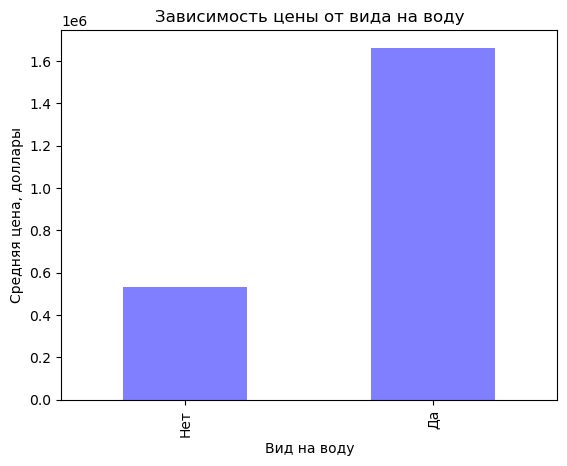

In [73]:
df.groupby("waterfront").mean()["price"].plot(kind="bar", color="blue", alpha=0.5)
plt.title("Зависимость цены от вида на воду")
plt.xlabel("Вид на воду")
plt.ylabel("Средняя цена, доллары")
plt.xticks([0,1],["Нет","Да"])
plt.show();

Диаграмма показывает, что наличие у недвижимости вид на воду может значительно повысить ее стоимость.

C:\Users\92202\AppData\Local\Temp\ipykernel_28052\3170786603.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Корреляция характеристик и цены недвижимости')

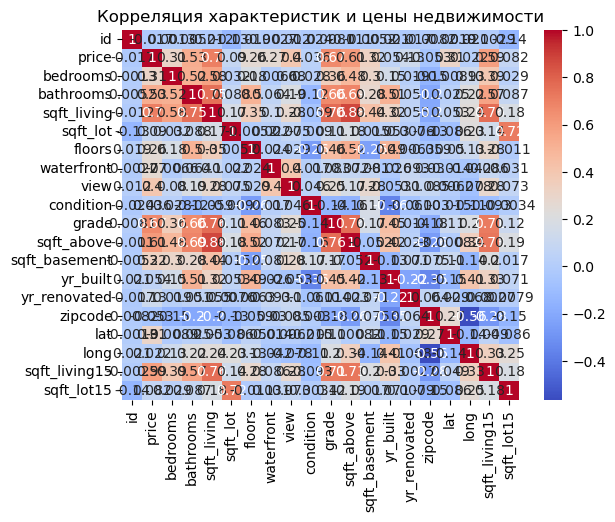

In [75]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Корреляция характеристик и цены недвижимости")

Диаграмма показывает коэффициенты корреляции между стоимостью недвижимости и каждой из характеристик. Наибольшее влияние на стоимость жилья имеют площадь жилья, степень обновления, количество ванных комнат, количество комнат и качество жилья.